# Linear Regression on IMR based on Maternal Care

Import necessary libraries


In [1]:
import turicreate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import datasets 

In [2]:
data = turicreate.SFrame('NFHS-4_NFHS3_Factsheet-All_India_Indicators_R1.csv')

Finished parsing file /home/vishwa/ML/Project/NFHS-4_NFHS3_Factsheet-All_India_Indicators_R1.csv

Parsing completed. Parsed 100 lines in 0.048357 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,float,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,st

Finished parsing file /home/vishwa/ML/Project/NFHS-4_NFHS3_Factsheet-All_India_Indicators_R1.csv

Parsing completed. Parsed 148 lines in 0.027832 secs.

# Preprocessing Data

## List all columns in the dataset

In [3]:
data.column_names()

['India/States/UTs',
 'Survey',
 'Area',
 'Population and Household Profile - Population (female) age 6 years and above who ever attended school (%)',
 'Population and Household Profile - Population below age 15 years (%)',
 'Population and Household Profile - Sex ratio of the total population (females per 1000 males)',
 'Population and Household Profile - Sex ratio at birth for children born in the last five years (females per 1000 males)',
 'Population and Household Profile - Children under age 5 years whose birth was registered (%)',
 'Population and Household Profile - Households with electricity (%)',
 'Population and Household Profile - Households with an improved drinking-water source (%)',
 'Population and Household Profile - Households using improved sanitation facility (%)',
 'Population and Household Profile - Households using clean fuel for cooking (%)',
 'Population and Household Profile - Households using iodized salt (%)',
 'Population and Household Profile - Households 

### Feature Selection and Filteration of Data

In [4]:
selected_columns = ['Infant and Child Mortality Rates (per 1000 live births) - Infant mortality rate (IMR)',
 'Infant and Child Mortality Rates (per 1000 live births) - Under-five mortality rate (U5MR)',
 'Maternity Care (for last birth in the 5 years before the survey) - Mothers who had antenatal check-up in the first trimester (%)',
 'Maternity Care (for last birth in the 5 years before the survey) - Mothers who had at least 4 antenatal care visits (%)',
 'Maternity Care (for last birth in the 5 years before the survey) - Mothers whose last birth was protected against neonatal tetanus (%)',
 'Maternity Care (for last birth in the 5 years before the survey) - Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
 'Maternity Care (for last birth in the 5 years before the survey) - Mothers who had full antenatal care (%)',
 'Maternity Care (for last birth in the 5 years before the survey) - Registered pregnancies for which the mother received Mother and Child Protection (MCP) card (%)',
 'Maternity Care (for last birth in the 5 years before the survey) - Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (%)',
 'Maternity Care (for last birth in the 5 years before the survey) - Mothers who received financial assistance under Janani Suraksha Yojana (JSY) for births delivered in an institution (%)',
 'Maternity Care (for last birth in the 5 years before the survey) - Average out of pocket expenditure per delivery in public health facility (Rs.)',
 'Maternity Care (for last birth in the 5 years before the survey) - Children born at home who were taken to a health facility for check-up within 24 hours of birth (%)',
 'Maternity Care (for last birth in the 5 years before the survey) - Children who received a health check after birth from a doctor/nurse/LHV/ANM/ midwife/other health personnel within 2 days of birth (%)',
 'Delivery Care (for births in the 5 years before the survey) - Institutional births (%)']

In [5]:
data = data[selected_columns]

### Rename columns for convenience

In [6]:
data = data.rename(
{
    'Infant and Child Mortality Rates (per 1000 live births) - Infant mortality rate (IMR)' : 'IMR',
    'Infant and Child Mortality Rates (per 1000 live births) - Under-five mortality rate (U5MR)' : 'U5MR',
    'Maternity Care (for last birth in the 5 years before the survey) - Mothers who had antenatal check-up in the first trimester (%)' : 'first_trimester_check',
    'Maternity Care (for last birth in the 5 years before the survey) - Mothers who had at least 4 antenatal care visits (%)' : 'at_least_4_checks',
    'Maternity Care (for last birth in the 5 years before the survey) - Mothers whose last birth was protected against neonatal tetanus (%)': 'tetanus_vaccination_mothers',
    'Maternity Care (for last birth in the 5 years before the survey) - Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)' : 'folic_acid_consumed',
    'Maternity Care (for last birth in the 5 years before the survey) - Mothers who had full antenatal care (%)' : 'full_care',
    'Maternity Care (for last birth in the 5 years before the survey) - Registered pregnancies for which the mother received Mother and Child Protection (MCP) card (%)' : 'MCP_card',
    'Maternity Care (for last birth in the 5 years before the survey) - Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (%)' : 'postnatal_care',
    'Maternity Care (for last birth in the 5 years before the survey) - Mothers who received financial assistance under Janani Suraksha Yojana (JSY) for births delivered in an institution (%)' : 'financial_assistance',
    'Maternity Care (for last birth in the 5 years before the survey) - Average out of pocket expenditure per delivery in public health facility (Rs.)' : 'avg_expenditure',
    'Maternity Care (for last birth in the 5 years before the survey) - Children born at home who were taken to a health facility for check-up within 24 hours of birth (%)' : 'home_post_partum_check',
    'Maternity Care (for last birth in the 5 years before the survey) - Children who received a health check after birth from a doctor/nurse/LHV/ANM/ midwife/other health personnel within 2 days of birth (%)': 'check_2_days',
    'Delivery Care (for births in the 5 years before the survey) - Institutional births (%)' : 'institutional_births'
    
    
})

#small_features = ['first_trimester_check', 'at_least_4_checks', 'full_care', 'post_partum_check']

In [7]:
features = data.column_names()[2:]
features

['first_trimester_check',
 'at_least_4_checks',
 'tetanus_vaccination_mothers',
 'folic_acid_consumed',
 'full_care',
 'MCP_card',
 'postnatal_care',
 'financial_assistance',
 'avg_expenditure',
 'home_post_partum_check',
 'check_2_days',
 'institutional_births']

In [8]:
data_subset = data[['IMR'] + features]
data_subset = data_subset.dropna()

## Train-Test Split

In [9]:
train_data, test_data = data_subset.random_split(.8, seed = 0)

# Simple Linear Regresssion
Using a single feature

In [10]:
model = turicreate.linear_regression.create(train_data, target= 'IMR', features = ['full_care'])

Linear regression:

--------------------------------------------------------

Number of examples          : 70

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.003979     | 20.491233          | 8.336200                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

## Sample Prediction

In [11]:
print ('Sample Query has data = ', test_data['full_care'][1])

print('Sample Query actual mortality rate value = ', test_data[1]['IMR'])

Sample Query has data =  24.0
Sample Query actual mortality rate value =  39


In [12]:
model.predict(test_data[1])

dtype: float
Rows: 1
[36.14981477739791]

### Model Evaluation 

In [13]:
model.evaluate(test_data)

{'max_error': 17.593779816534017, 'rmse': 8.25934547800251}

In [14]:
model.save('simple_lr_model.tc')

# Multiple Regression
Using more than one feature to make predictions

In [15]:
model = turicreate.linear_regression.create(train_data, target= 'IMR', features= features)

Linear regression:

--------------------------------------------------------

Number of examples          : 70

Number of features          : 12

Number of unpacked features : 12

In [16]:
model.coefficients.print_rows(14, 3)

+-----------------------------+-------+------------------------+-----+
|             name            | index |         value          | ... |
+-----------------------------+-------+------------------------+-----+
|         (intercept)         |  None |    47.291528148195     | ... |
|    first_trimester_check    |  None |   0.1650082976657481   | ... |
|      at_least_4_checks      |  None |  -0.1801146493082395   | ... |
| tetanus_vaccination_mothers |  None |  0.03307424216042351   | ... |
|     folic_acid_consumed     |  None |  0.22941927016792596   | ... |
|          full_care          |  None |  -0.2538911515360698   | ... |
|           MCP_card          |  None |   -0.043271422582478   | ... |
|        postnatal_care       |  None |  -0.31123387473209363  | ... |
|     financial_assistance    |  None |   0.1956684443905419   | ... |
|       avg_expenditure       |  None | -0.0008790121063311567 | ... |
|    home_post_partum_check   |  None |   0.0926350065263792   | ... |
|     

In [17]:
# Save model for further use
model.save('multiple_lr_model.tc')

Number of coefficients    : 13

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.000651     | 18.634056          | 6.453983                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

## Sample Prediction

In [18]:
print ('Sample Query has data = ', test_data[1])

print('Sample Query actual mortality rate value = ', test_data[1]['IMR'])

Sample Query has data =  {'IMR': 39, 'first_trimester_check': 69.7, 'at_least_4_checks': 63.2, 'tetanus_vaccination_mothers': 83.5, 'folic_acid_consumed': 31.4, 'full_care': 24.0, 'MCP_card': 92.3, 'postnatal_care': 60.3, 'financial_assistance': 12.9, 'avg_expenditure': 2020, 'home_post_partum_check': 3.2, 'check_2_days': 15.8, 'institutional_births': 85.5}
Sample Query actual mortality rate value =  39


In [19]:
print('prediction made by Regression ML model = ', model.predict(test_data[1]))

prediction made by Regression ML model =  [30.957268932748796]


In [20]:
model.predict(test_data[1])

dtype: float
Rows: 1
[30.957268932748796]

### Model Evaluation

In [21]:
model.evaluate(test_data)

{'max_error': 12.086122564709115, 'rmse': 5.838726423119287}

# LASSO REGRESSION: L1 penalty testing


### Searching over large range of values of l1_penalty

In [22]:
best_penalty = None
min_rmse = None
nnz_dict = {}
errors = []
for l1_penalty in np.linspace(0, 50, num=50):
    model = turicreate.linear_regression.create(train_data, target='IMR', features=features, validation_set=None, 
                                               l1_penalty=l1_penalty, l2_penalty=0., verbose=False, max_iterations=100)
    rmse = model.evaluate(test_data)['rmse']
    errors.append(rmse)
    nnz_dict[l1_penalty] = model.coefficients['value'].nnz()
    if min_rmse == None or min_rmse > rmse:
        min_rmse = rmse
        best_penalty = l1_penalty
        

print('best l1 penalty = ' + str(best_penalty))


best l1 penalty = 0.0


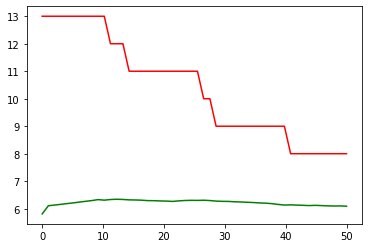

In [23]:
plt.plot(np.linspace(0, 50, num=50), nnz_dict.values(), '-r',
         np.linspace(0, 50, num=50), errors, '-g',)


## Conclusion:
For the current scenario, in the best-case with lowest rmse, no weights were set to 0, i.e. all the features were estimated to have a significant impact to the prediction of the target value.

# Polynomial Regression


In [24]:
#Function for getting powers of values of given features for running Polynomial Regression.
#polynomial_sframe accepts dataset (SFrame), list of features (string), and degree of polynomial (integer),
#target column name(string)
# and returns an SFrame
def polynomial_sframe(data, features, degree, target=None):
    # assume that degree >= 1
    poly_sframe = turicreate.SFrame()
    for feature in features:
        # and set poly_sframe['power_1'] equal to the passed feature
        poly_sframe[feature + '_power_1'] = data[feature]
        if degree > 1:
            for power in range(2, degree+1): 
                name = feature + '_power_' + str(power)
                poly_sframe[name] = data[feature] ** power
    if target:
        columns = poly_sframe.column_names()
        poly_sframe[target] = data[target]
        return (poly_sframe, columns)
    return poly_sframe

In [25]:
small_poly_train_data, poly_features = polynomial_sframe(train_data, features, 2, target='IMR')
poly_features

['first_trimester_check_power_1',
 'first_trimester_check_power_2',
 'at_least_4_checks_power_1',
 'at_least_4_checks_power_2',
 'tetanus_vaccination_mothers_power_1',
 'tetanus_vaccination_mothers_power_2',
 'folic_acid_consumed_power_1',
 'folic_acid_consumed_power_2',
 'full_care_power_1',
 'full_care_power_2',
 'MCP_card_power_1',
 'MCP_card_power_2',
 'postnatal_care_power_1',
 'postnatal_care_power_2',
 'financial_assistance_power_1',
 'financial_assistance_power_2',
 'avg_expenditure_power_1',
 'avg_expenditure_power_2',
 'home_post_partum_check_power_1',
 'home_post_partum_check_power_2',
 'check_2_days_power_1',
 'check_2_days_power_2',
 'institutional_births_power_1',
 'institutional_births_power_2']

In [26]:
pr_model = turicreate.linear_regression.create(small_poly_train_data, target='IMR', features=poly_features, validation_set=None)
pr_model

Linear regression:

--------------------------------------------------------

Number of examples          : 70

Number of features          : 24

Number of unpacked features : 24

Number of coefficients    : 25

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.000590     | 13.923484          | 5.085911                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Class                          : LinearRegression

Schema
------
Number of coefficients         : 25
Number of examples             : 70
Number of feature columns      : 24
Number of unpacked features    : 24

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.001

Settings
--------
Residual sum of squares        : 1810.654
Training RMSE                  : 5.0859

Highest Positive Coefficients
-----------------------------
(intercept)                    : 48.7494
home_post_partum_check_power_1 : 1.3568
check_2_days_power_1           : 1.2094
postnatal_care_power_1         : 0.684
MCP_card_power_1               : 0.5136

Lowest Negative Coefficients
----------------------------
first_trimester_check_power_1  : -1.057
full_ca

In [27]:
t2 = test_data[10]
t2

{'IMR': 38,
 'first_trimester_check': 75.7,
 'at_least_4_checks': 74.2,
 'tetanus_vaccination_mothers': 96.6,
 'folic_acid_consumed': 54.9,
 'full_care': 40.2,
 'MCP_card': 99.4,
 'postnatal_care': 71.6,
 'financial_assistance': 38.3,
 'avg_expenditure': 2474,
 'home_post_partum_check': 0.0,
 'check_2_days': 14.4,
 'institutional_births': 94.4}

In [28]:
pr_model.evaluate(test_data)

{'max_error': 20.814285714285717, 'rmse': 11.404310558719798}

In [29]:
pr_model.coefficients.sort('value').print_rows(30,3)

+--------------------------------+-------+------------------------+-----+
|              name              | index |         value          | ... |
+--------------------------------+-------+------------------------+-----+
| first_trimester_check_power_1  |  None |  -1.0570164882005484   | ... |
|       full_care_power_1        |  None |  -0.5336571943155781   | ... |
|  folic_acid_consumed_power_1   |  None |  -0.44630405266685574  | ... |
| home_post_partum_check_power_2 |  None |  -0.19753205019617529  | ... |
|  financial_assistance_power_1  |  None |  -0.10272418889199461  | ... |
|      check_2_days_power_2      |  None | -0.014685257170431275  | ... |
|     postnatal_care_power_2     |  None | -0.007741936861624842  | ... |
| tetanus_vaccination_mother...  |  None | -0.0038896951207166093 | ... |
|        MCP_card_power_2        |  None | -0.0031971121828954364 | ... |
|    avg_expenditure_power_1     |  None | -0.0028745337094044365 | ... |
|  institutional_births_power_2  |  No

In [30]:
pr_model.save('pr_model.tc')

## Cross Validation

Since we have relatively low number of data points, we use Cross Validation to select an appropriate value of l2_penalty


In [31]:
def shuffle_sframe(sf, random_seed=None):
    temp_shuffle_col="shuffle_col"
    shuffled_sframe = sf.copy()
    shuffled_sframe[temp_shuffle_col] = turicreate.SArray.random_integers(sf.num_rows(), random_seed)
    return shuffled_sframe.sort(temp_shuffle_col).remove_column(temp_shuffle_col)

def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    sum_ = 0
    n = len(data)
    for i in range(k):
        start = (n*i)/k
        end = ((n*(i+1))/k)-1
        validation_data = data[start : end+1]
        training_data= data[0:start].append(data[end+1:n])

        model = turicreate.linear_regression.create(dataset=training_data, target=output_name, features=features_list, validation_set=None, l2_penalty= l2_penalty, verbose=False)
        sum_ += model.evaluate(validation_data)['rmse']
    result = sum_/k
    return result
 

In [32]:
shuffle_sframe(train_data)

IMR,first_trimester_check,at_least_4_checks,tetanus_vaccination_mothers ...,folic_acid_consumed,full_care,MCP_card
31,74.1,78.8,86.2,29.5,26.0,88.8
64,45.9,26.4,86.6,12.9,5.9,79.8
32,50.7,46.3,77.6,33.2,20.9,94.6
29,69.1,66.4,89.9,40.8,31.1,87.7
35,79.2,72.7,88.5,47.5,37.3,92.2
23,68.7,75.6,90.0,43.9,35.7,88.8
25,72.6,62.0,87.1,32.7,27.8,34.2
21,69.6,69.7,96.5,46.5,27.1,97.2
34,70.4,52.1,95.7,26.9,17.9,88.0
31,77.0,77.5,88.5,59.3,47.9,97.8


In [33]:
data_10, poly_features = polynomial_sframe(train_data, features, 10, 'IMR')
test_10, _ = polynomial_sframe(test_data, features, 10, 'IMR')

errors = []
min_error = None
for penalty in np.linspace(1, 2000, num=13):
    error = k_fold_cross_validation(5, penalty, data_10 ,'IMR', poly_features)
    errors.append(error)
    if min_error == None or min_error - error > 1:  # min_error > error  :    #error-min_error > 0.5
        min_error = error
        min_error_penalty = penalty
    
        
print('min_error_penalty = ', min_error_penalty, '\nmin_error = ', min_error)
            

min_error_penalty =  833.9166666666667 
min_error =  9.953980895848147


In [34]:
pr_ridge_model = turicreate.linear_regression.create(data_10, target='IMR', features=poly_features, validation_set=None, l2_penalty = 250)
pr_ridge_model

Linear regression:

--------------------------------------------------------

Number of examples          : 70

Number of features          : 120

Number of unpacked features : 120

Number of coefficients    : 121

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.006333     | 24.579200          | 7.515561                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Class                          : LinearRegression

Schema
------
Number of coefficients         : 121
Number of examples             : 70
Number of feature columns      : 120
Number of unpacked features    : 120

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 250.0

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0073

Settings
--------
Residual sum of squares        : 3953.856
Training RMSE                  : 7.5156

Highest Positive Coefficients
-----------------------------
(intercept)                    : 39.954
financial_assistance_power_1   : 0.0082
home_post_partum_check_power_1 : 0.0061
check_2_days_power_1           : 0.0058
home_post_partum_check_power_2 : 0.0007

Lowest Negative Coefficients
----------------------------
full_care_power_1              : -0.0092
a

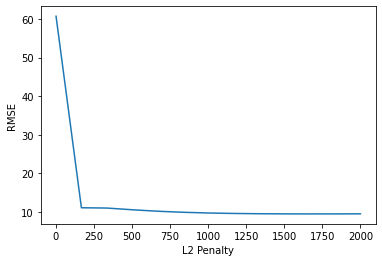

In [35]:
plt.xlabel('L2 Penalty')
plt.ylabel('RMSE')
plt.plot(np.linspace(1, 2000, num=13), errors, '-')

## Conclusion:
We choose l2_penalty = 250 at the elbow of the plot to avoid underfitting caused by higher values of l2_penalty.

In [36]:
pr_ridge_model.evaluate(test_10)

{'max_error': 13.727412001639621, 'rmse': 7.429576672196218}

In [37]:
pr_ridge_model.save('pr_ridge_model.tc')

# Results:
Multiple Regression model was found to have the best performance and accuracy for the current dataset with an RMSE value of 5.83. Other tested models could perform better with an increased dataset size in the future.